In [ ]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [3]:
# from rocket_euler import Rocket
from src.pos_rocket_vis import *
from NonLinearMPC_7.nmpc_land import NmpcCtrl
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [4]:
sim_time = 10  # simulation length in seconds
H = 0.5
N = int(H / Ts)
x0 = np.array([0.0]*3 + [np.deg2rad(30)] + [0.0]*5 + [1.0, 2.0, 10.0])
x_ref = np.array([0.0]*9 + [1.0, 0.0, 3.0])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

H = 0.5 # horizon time 
nmpc = NmpcCtrl(rocket, Ts, xs, us, N=N)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


In [5]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(nmpc, sim_time, H, x0)

Simulating time 0.00
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 208.00us (  2.42us) 203.53us (  2.37us)        86
       nlp_g  |   1.07ms ( 12.47us)   1.16ms ( 13.52us)        86
  nlp_grad_f  | 285.00us (  3.28us) 278.66us (  3.20us)        87
  nlp_hess_l  |   2.19ms ( 25.78us)   2.19ms ( 25.76us)        85
   nlp_jac_g  |   1.39ms ( 15.98us)   1.39ms ( 16.00us)        87
       total  | 129.46ms (129.46ms) 134.15ms (134.15ms)         1
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  76.00us (  2.38us)  73.42us (  2.29us)        32
       nlp_g  | 262.00us (  8.19us) 246.39us (  7.70us)        32
  nlp_grad_f  | 103.00us (  3.12us)  98.68us (  2.99us)        33
  nlp_hess_l  | 728.00us ( 23.48us) 726.73us ( 23.44us)        31
   nlp_jac_g  | 503.00us ( 15.24us) 506.50us ( 15.35us)        33
       total  |  43.17ms ( 43.17ms)  45.14ms ( 45.14ms)         1
      solver  :   t_proc      (avg)   t_wall      (avg)

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

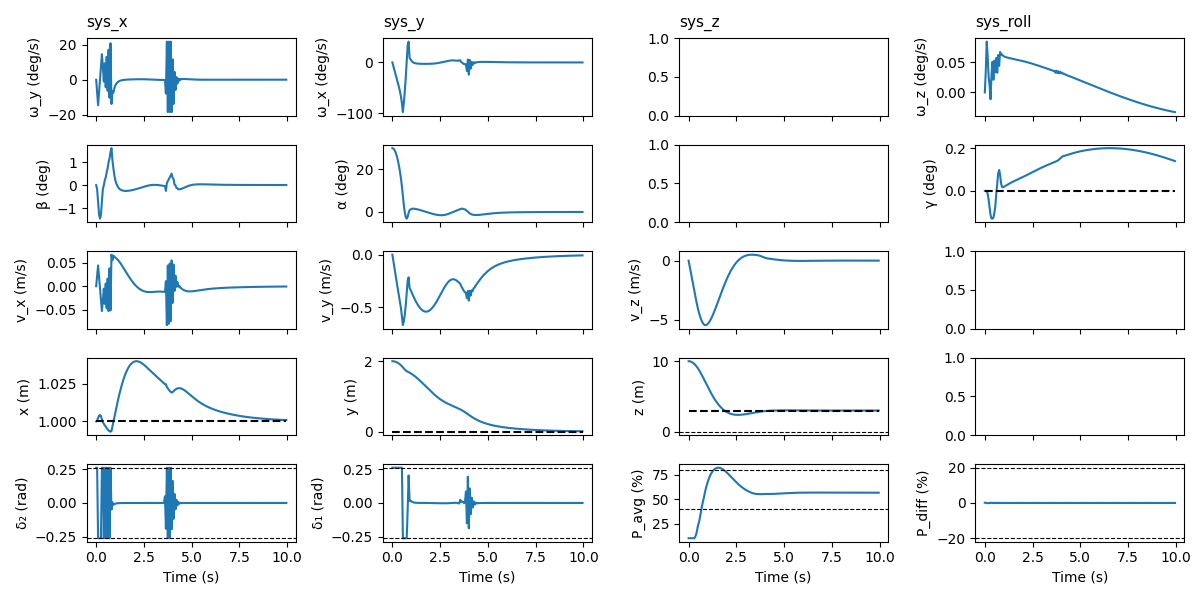

In [6]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)